In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")


In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station= Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(bind=engine)

In [10]:
#Use SQLAlchemy `automap_base()` to reflect your tables into classes and save a reference to those classes called `Station` and `Measurement`.
# See above

# Exploratory Climate Analysis

In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
from datetime import date
from dateutil.relativedelta import relativedelta
#Finding the Last date listed
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23')

In [12]:
#Finding 12 months prior to that date
date(2017,8,23)+relativedelta(months=-12)

datetime.date(2016, 8, 23)

In [13]:
#Creating DF, Setting index to Date


percip= session.query(Measurement.date, Measurement.prcp).\
filter(Measurement.date > '2016-08-23').order_by(Measurement.date.desc()).all()
percipDB=pd.DataFrame(percip,columns=['date','prcp'])
percipDB=percipDB.set_index('date')
percipDB

#percipDB=percipDB.sort_values('date')
#percipDB.set_index('date')
#percipDB.set_index(percipDB['date'],append =True)

,prcp
date,
2017-08-23,0.00
2017-08-23,0.00
2017-08-23,0.08
2017-08-23,0.45
2017-08-22,0.00
...,...
2016-08-24,2.28
2016-08-24,NaN
2016-08-24,1.22


Text(0, 0.5, 'Rain')

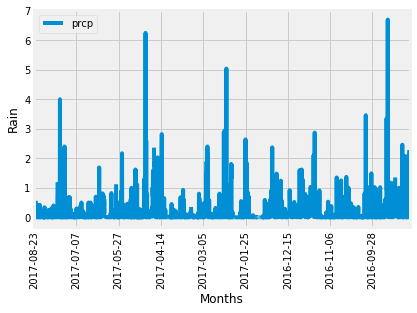

In [14]:
percipDB.plot(rot=90)
plt.xlabel("Months")
plt.ylabel("Rain")


In [15]:
# Calculate the date 1 year ago from the last data point in the database
date(2017,8,23)+relativedelta(months=-12)

datetime.date(2016, 8, 23)

In [18]:
# Perform a query to retrieve the data and precipitation scores
percip= session.query(Measurement.date, Measurement.prcp).\
filter(Measurement.date >= '2016-08-23').order_by(Measurement.date.desc()).all()

In [19]:
# Save the query results as a Pandas DataFrame and set the index to the date column
percipDB=pd.DataFrame(percip,columns=['date','percipitation'])

In [20]:
# Sort the dataframe by date
percipDB=percipDB.set_index('date')

Text(0, 0.5, 'Inches of Rain')

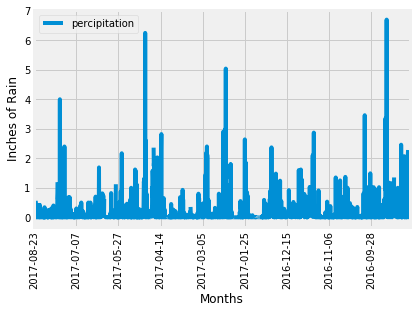

In [21]:
# Use Pandas Plotting with Matplotlib to plot the data
percipDB.plot(rot=90)
plt.xlabel("Months")
plt.ylabel("Inches of Rain")

In [22]:
# Use Pandas to calcualte the summary statistics for the precipitation data
percipDB.describe()


,percipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [23]:
# Design a query to show how many stations are available in this dataset?
session.query(func.count(Station.station)).all()

[(9)]

In [24]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.

session.query(Measurement.station,func.count(Measurement.station)).\
group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()



#Statx=session.query(Measurement.station).all()
#session.query(Station.station).join(Measurement.station)

# Table_of_Stations=pd.DataFrame(TS).join(Station.station)
# Table_of_Stations
    
# Table= session.query(Measurmement)
# for player in players:
#   print(player.name_given)

#Table=pd.DataFrame(Measurement,Station).join(Measurement).filter(Station.station)==Measurement.station)
#Table

#session.query(Measurement,Station).join(Station).filter(Station.station ==Measurement.station)
#print([Measurement,Station,type(Measurement),type(Station)])

# df=pd.read_sql(TM.statement,TM.session.bind)
# df.head()

#Table=pd.DataFrame(TM)
#Table
# 

#Tables=Table_of_Stations.groupby('station')
#Table_of_Stations
#.filter(EA.sporder == NA.sporder)

# attacks = session.query(Sharks) 
# for attack in attacks:
#     print(attack.location)

#Table=Table_of_Stations.groupby('station')
#group_by((Measurement.station).count())

#.all()
#session.query()
# SES=session.query(Station.name)
# session.query(Measurement.station).all()
# group_by(func.count(SES).desc)
# # group_by(Station.name)/
# # group_by(Measurement.)

# #session.query(func.count(Measurement.station)).\

# session.query(Measurement.station)
# for station in query:
  
#     print session.query(User).count()

# SELECT Measurement.station, COUNT(Station.name) AS "Stations"
# FROM Measurement
# JOIN country ON Station.name = Measurement.country_id
# GROUP BY country.country
# ORDER BY "country count" DESC;

#session.query(Station.station)
#session.query(func.count(Measurement.station)).all()
# percip= session.query(Measurement.date, Measurement.prcp).\
# filter(Measurement.date > '2016-08-23').order_by(Measurement.date.desc()).all()
# percipDB=pd.DataFrame(percip,columns=['date','prcp'])
# percipDB=percipDB.set_index('date')
# percipDB
#Stndb=pd.DataFrame(Stn,columns=['station'])
#Stndb=Stndb.set_index('station')
#Stndb

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [25]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 

DEGREE=session.query(Measurement.tobs).order_by(Measurement.tobs).\
order_by(Measurement.tobs.desc()).first()
DEGREE

(53.0)

In [26]:
#Personal BONUS Just for fun I want to see wich station recorded this.

session.query(Measurement.tobs,Measurement.station).order_by(Measurement.tobs).\
order_by(Measurement.tobs.desc()).first()

(53.0, 'USC00511918')

In [27]:
#Personal BONUS Now I want to find the name of this station in the station table

HAWAII=session.query(Station.station,Station.name).order_by(Station.name).\
order_by(Station.station == 'USC00511918').first()
HAWAII

('USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US')

In [28]:
#Personal Bonus Putting it together into a sentence
print(f"The lowest temp recorded in Hawaii was{DEGREE}and it was recorded by {HAWAII}!")

The lowest temp recorded in Hawaii was(53.0,)and it was recorded by ('USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US')!


In [29]:
# highest temperature recorded, and average temperature of the most active station?
# Solved this in 4 Parts

In [30]:
# This shows the most active station
session.query(Measurement.station,func.count(Measurement.station)).\
group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).first()

('USC00519281', 2772)

In [31]:
#This part finds the avg for the most active station
session.query(Measurement.station,func.avg(Measurement.tobs)).\
filter(Measurement.station=='USC00519281').all()

[('USC00519281', 71.66378066378067)]

In [32]:
#This part shows the highest temp recorded
session.query(func.max(Measurement.tobs)).first()


(87.0)

In [33]:
#This one puts it together into a sentence

TEM=session.query(func.max(Measurement.tobs)).first()
#print(TEM)


TAMP=session.query(Measurement.station,func.avg(Measurement.tobs)).\
filter(Measurement.station=='USC00519281').first()
#print(TAMP)


print(f"The highest temp recorded in Hawaii was{TEM}and the most active station and its average temp is {TAMP}!")


The highest temp recorded in Hawaii was(87.0,)and the most active station and its average temp is ('USC00519281', 71.66378066378067)!


In [34]:
# Choose the station with the highest number of temperature observations.
TAMP=session.query(Measurement.station,func.count(Measurement.station)).\
group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).first()
print(TAMP.station)

USC00519281


In [35]:
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

session.query(Measurement.station,Measurement.date,Measurement.tobs).\
filter(Measurement.station=='USC00519281').order_by(Measurement.date.desc()).first()

('USC00519281', '2017-08-18', 79.0)

In [36]:
date(2017,8,18)+relativedelta(months=-12)

datetime.date(2016, 8, 18)

Text(0, 0.5, 'Temp')

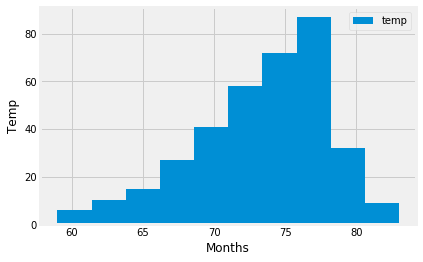

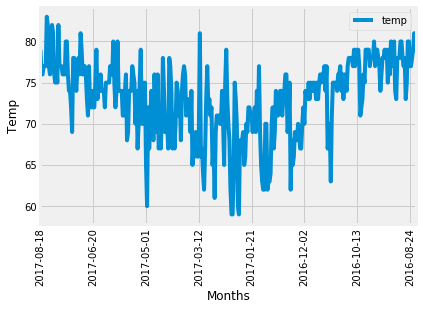

In [39]:
temp= session.query(Measurement.date, Measurement.tobs).\
filter(Measurement.date >= '2016-08-18',Measurement.station =='USC00519281').order_by(Measurement.date.desc()).all()
#temp
tempDB=pd.DataFrame(temp,columns=['date','temp'])
tempDB=tempDB.set_index('date')
#tempDB

#tempDB.plot(kind='hist')

plot = tempDB.plot(y="temp",kind="hist")
plot.set_xlabel("Months")
plot.set_ylabel("Temp")



#This one I wante to make just for me. 
#Personal Bonus which i think better illustrates the situation.
tempDB.plot(rot=90)
plt.xlabel("Months")
plt.ylabel("Temp")



















## Bonus Challenge Assignment

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
